<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/%ED%98%95%ED%83%9C%EC%86%8C_%EB%B6%84%EC%84%9D_%EB%B0%8F_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 형태소 분석 및 WorldCloud

## 1.1 그래프 한글 인식 세팅

In [2]:
##한글 폰트 인식

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,058 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

## 1.2 KoNLPY 설치

In [ ]:
! pip install konlpy

### 1.3. package 설치


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2. 데이터 전처리
import re

# 3. 형태소 분석
from konlpy.tag import Okt

# 4. Worl]dcloud
import nltk
from collections import Counter
from wordcloud import WordCloud


# 2. DATA 불러오기

In [3]:
news = pd.read_csv("news.csv")

In [4]:
news

,class,text
0,Pol,문대통령 마스크 불편 국민께 송구…모든조직 24시간 긴급체제 종합
1,Pol,갑자기 지역구 사라진 이준석 “신천지고 뭐고 비상 걸렸다”
2,Pol,가짜 논란 이만희 박근혜 시계 두고… 황교익 朴이 선물했을 수도
3,Pol,북한군 한국산 마스크 밀수···포장만 바꿔 평양 보냈다
4,Pol,하루이틀 지나면 효과 있을거라더니… 文대통령 마스크 공급 부족 그대로 알리라
...,...,...
595,Tech,속보 코로나19 대구 확진자 1명 추가 사망 17번째
596,Tech,지난 100년 최대 위협은 독감 코로나19 대유행 가능성은
597,Tech,휴대폰·DP 이어 반도체 코로나19 ‘우려’…삼성 기흥사업장 확진자 발생 종합
598,Tech,‘9분 완판’ 갤Z플립 VS ‘40만 예약’ 메이트Xs 中서 또 붙었다


In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   600 non-null    object
 1   text    600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [7]:
news["text"].iloc[0]

'문대통령  마스크 불편 국민께 송구…모든조직 24시간 긴급체제  종합 '

##2.2 문서 전처리 및 동음이의어 정리

In [14]:
news_list = []

for i in range(len(news)):
  text = news["text"].iloc[i]
  text = re.sub("[|x00-|x1F|x7F]", "", text)   # 제어문자 정리 []
  text = re.sub("[|W]", "", text)             # 구두점 제거
  text = re.sub("(文대통령|文 대통령|文|문 대통령)","문대통령", text)    # 2음절 단어 제거
  news_list.append(text)

news_list

['문대통령  마스크 불편 국민께 송구…모든조직 시간 긴급체제  종합 ',
 '갑자기 지역구 사라진 이준석 “신천지고 뭐고 비상 걸렸다”',
 '가짜 논란 이만희  박근혜 시계  두고… 황교익  朴이 선물했을 수도 ',
 ' 북한군  한국산 마스크 밀수···포장만 바꿔 평양 보냈다 ',
 '하루이틀 지나면 효과 있을거라더니… 문대통령  마스크 공급 부족  그대로 알리라 ',
 ' 환자 근처도 안간다  루머에…안철수 측  국민이 단죄해달라 ',
 '문대통령  공급 부족  국민께 매우 송구 …마스크 대란 첫 사과',
 ' 단독 靑 전·현직 모두 “신천지 이만희가 찬 ‘박근혜 시계’는 가짜”',
 '“가짜” “정치공작”…이만희 ‘박근혜 시계’에 미래통합당 ‘화들짝’',
 ' 마스크 대란 에 고개 숙인 문대통령… 장관은 현장으로  채찍질',
 '황교익 “박근혜  이만희만을 위해 금장시계 선물했을 수도”',
 '중국 주민들  한국 교민 집 각목으로 막고 못질',
 ' 단독  비례 연합정당   정의당 없이는 창당도 없다…민주당만으론 안 한다 ',
 ' 속보 해군 참수리 고속정서 수류탄 폭발사고…장병 명 부상',
 '“안철수는 원래 그런 사람”…땀 범벅 의료복에 쏟아진 찬사',
 '정치권으로 번진 ‘박근혜 시계’ 논란…“朴 무서워서 나오는 것”',
 '문대통령 “험지 대구로 떠나는 간호장교들 자랑스럽다”',
 '안철수 측  ‘의료봉사는 쇼’ 주장에 “국민께서 단죄해달라”',
 '배현진 서울 송파을 단수추천… 홍준표 경남 양산을 컷오프 수순',
 '한선교  문대통령정권이 수퍼전파자 … 정의·민생당  대표연설 보이콧',
 '해군 고속정 수류탄 폭발…명 중상  명 경상',
 ' 머잖아 종식  문대통령 왜 사과 없나···與 엄습한  년차 레임덕  걱정',
 '해군  고속정에서 수류탄 폭발로 명 부상 ',
 '문대통령  정부 마스크 문제 감수성 있었나  호된 질책 속보 ',
 '느닷없이 잘린 당 인자…김정은  평양 입시비리에 격노했다',
 ' 속보  군내 코로나 확진자 명 추가… 

# 3. 형태소 분리 및 불용어 처리

In [35]:
#명사, 동사, 형용사 분리

okt = Okt()
words_list = []
stop_words = ["이다", "아니다", "돼다", "없다"]

for i in range(len(news_list)):
  text = news_list[i]
  morp = okt.pos(text, stem=True)

  for word, tag in morp:
    if (tag == "Noun" or tag == "Verb" or tag == "Adjective") and (len(word) > 1) and (word not in stop_words):
      words_list.append(word)
words_list


['대통령',
 '마스크',
 '불편',
 '국민',
 '송구',
 '조직',
 '시간',
 '긴급',
 '체제',
 '종합',
 '갑자기',
 '지역구',
 '사라지다',
 '이준석',
 '신천지',
 '비상',
 '걸리다',
 '가짜',
 '논란',
 '이만',
 '희다',
 '박근혜',
 '시계',
 '두다',
 '황교익',
 '선물',
 '하다',
 '수도',
 '북한',
 '국산',
 '마스크',
 '밀수',
 '포장',
 '바꾸다',
 '평양',
 '보내다',
 '하루',
 '이틀',
 '지나다',
 '효과',
 '있다',
 '더니',
 '대통령',
 '마스크',
 '공급',
 '부족',
 '그대로',
 '알리',
 '환자',
 '근처',
 '간다',
 '루머',
 '안철수',
 '국민',
 '단죄',
 '해달라다',
 '대통령',
 '공급',
 '부족',
 '국민',
 '매우',
 '송구',
 '마스크',
 '대란',
 '사과',
 '단독',
 '현직',
 '모두',
 '신천지',
 '이만',
 '희다',
 '박근혜',
 '시계',
 '늘다',
 '가짜',
 '가짜',
 '정치',
 '공작',
 '이만',
 '희다',
 '박근혜',
 '시계',
 '미래',
 '통합',
 '마스크',
 '대란',
 '고개',
 '숙이다',
 '대통령',
 '장관',
 '현장',
 '채찍',
 '황교익',
 '박근혜',
 '이만',
 '희다',
 '위해',
 '시계',
 '선물',
 '하다',
 '수도',
 '중국',
 '주민',
 '한국',
 '교민',
 '각목',
 '막다',
 '못질',
 '단독',
 '비례',
 '연합',
 '정당',
 '정의당',
 '민주당',
 '하다',
 '속보',
 '해군',
 '참수리',
 '고속',
 '정서',
 '수류탄',
 '폭발사고',
 '장병',
 '부상',
 '안철수',
 '원래',
 '그렇다',
 '사람',
 '범벅',
 '의료',
 '쏟아지다',
 '찬사',
 '정치권',
 '번진',
 '박근혜',
 '시계',
 '논란'

# 4. 단어 빈도 분석

In [36]:
word_freq = nltk.FreqDist(words_list)
word = word_freq.keys()
freq = list(word_freq.values())
word_count_df = pd.DataFrame([word, freq],
                             index = ["word", "freq"]).T
word_count_df.sort_values(by =["freq"],
                          ascending =False,
                          inplace = True)
word_count_df

,word,freq
149,코로나,130
1,마스크,86
26,하다,72
20,희다,63
19,이만,62
...,...,...
378,집회,1
375,황교안,1
374,동민,1
373,모시다,1


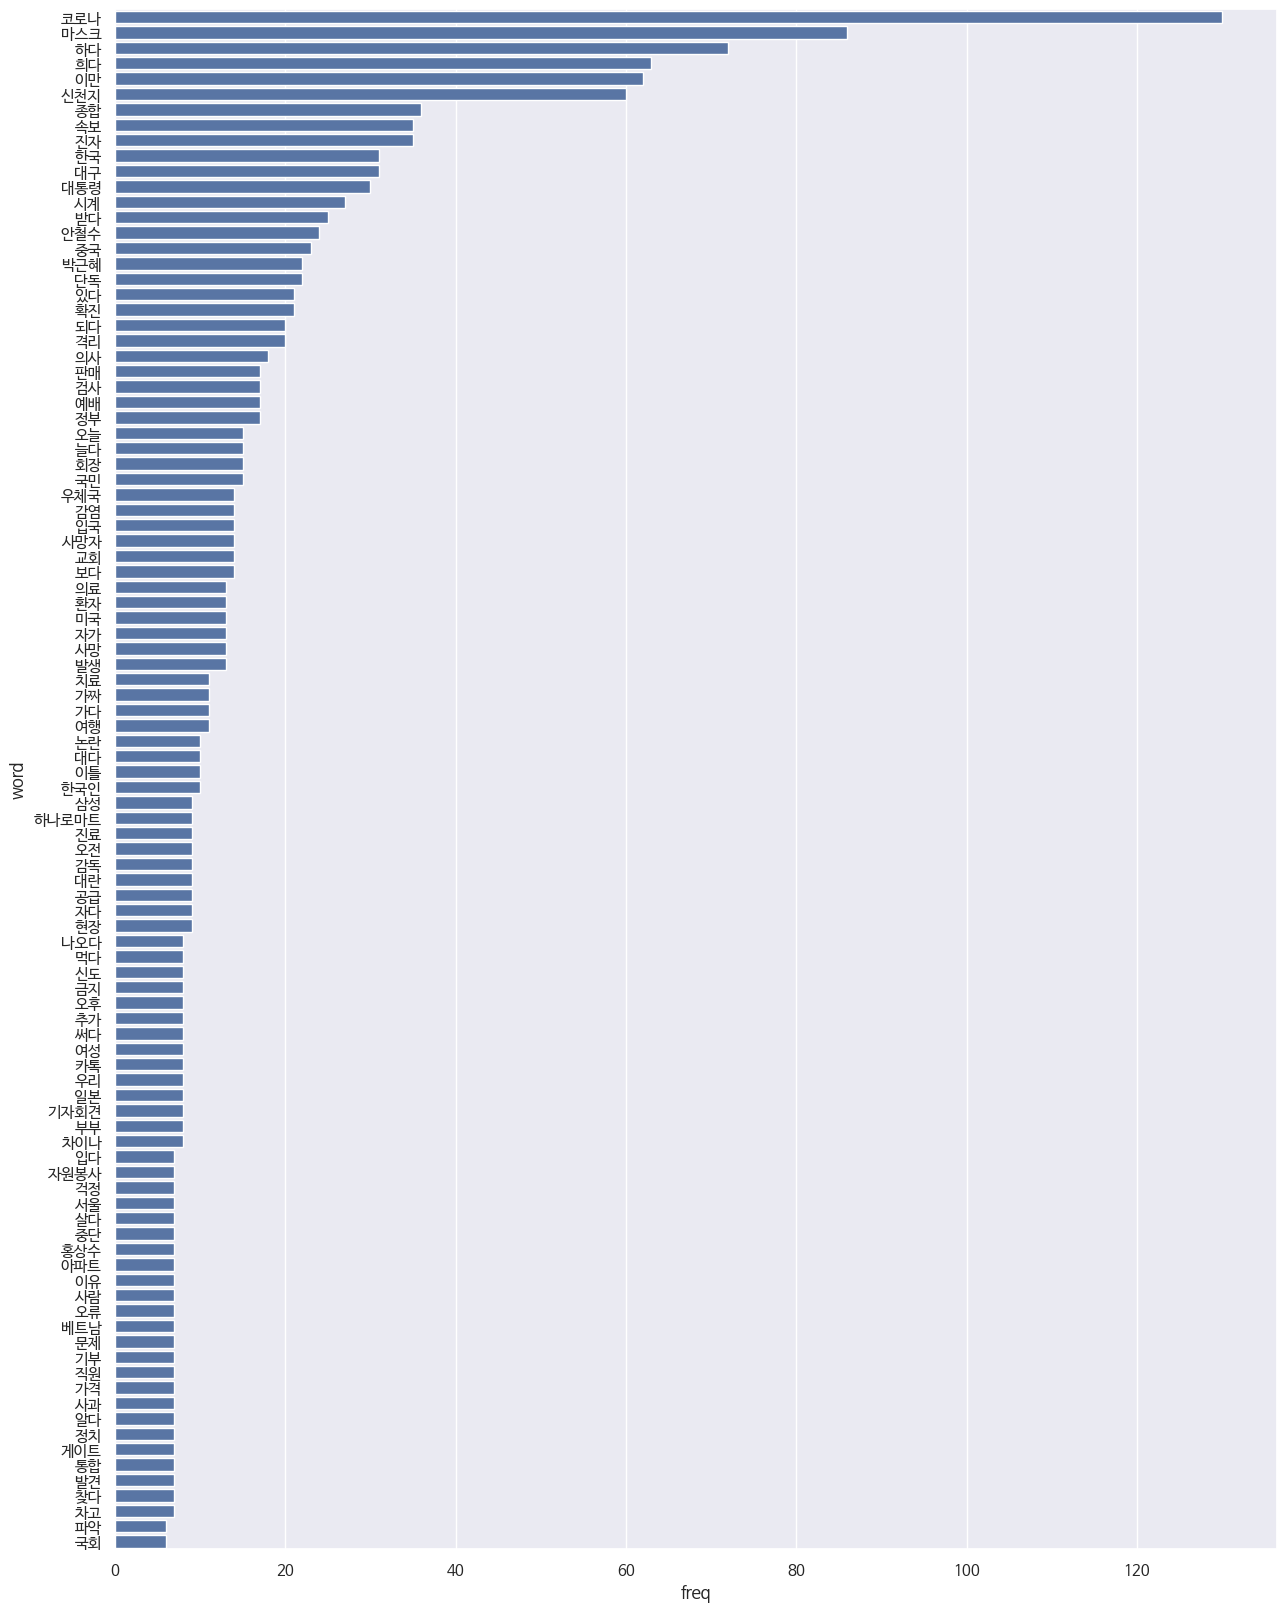

In [37]:
plt.rc("font", family="NanumBarunGothic")

fig, ax = plt.subplots(figsize=(15,20))
sns.set(font_scale =1)
ax = sns.barplot(y ="word",
                 x="freq",
                 data= word_count_df[:100])

plt.show()

# 5. Wordcloud

In [39]:
word_counts = Counter(words_list)
word_counts = word_counts.most_common(100)
word_counts

[('코로나', 130),
 ('마스크', 86),
 ('하다', 72),
 ('희다', 63),
 ('이만', 62),
 ('신천지', 60),
 ('종합', 36),
 ('속보', 35),
 ('진자', 35),
 ('한국', 31),
 ('대구', 31),
 ('대통령', 30),
 ('시계', 27),
 ('받다', 25),
 ('안철수', 24),
 ('중국', 23),
 ('박근혜', 22),
 ('단독', 22),
 ('있다', 21),
 ('확진', 21),
 ('되다', 20),
 ('격리', 20),
 ('의사', 18),
 ('정부', 17),
 ('검사', 17),
 ('판매', 17),
 ('예배', 17),
 ('국민', 15),
 ('늘다', 15),
 ('오늘', 15),
 ('회장', 15),
 ('입국', 14),
 ('보다', 14),
 ('우체국', 14),
 ('교회', 14),
 ('감염', 14),
 ('사망자', 14),
 ('환자', 13),
 ('의료', 13),
 ('자가', 13),
 ('발생', 13),
 ('사망', 13),
 ('미국', 13),
 ('가짜', 11),
 ('가다', 11),
 ('치료', 11),
 ('여행', 11),
 ('논란', 10),
 ('이틀', 10),
 ('한국인', 10),
 ('대다', 10),
 ('공급', 9),
 ('대란', 9),
 ('현장', 9),
 ('자다', 9),
 ('진료', 9),
 ('오전', 9),
 ('삼성', 9),
 ('하나로마트', 9),
 ('감독', 9),
 ('나오다', 8),
 ('추가', 8),
 ('부부', 8),
 ('차이나', 8),
 ('우리', 8),
 ('신도', 8),
 ('금지', 8),
 ('오후', 8),
 ('먹다', 8),
 ('써다', 8),
 ('일본', 8),
 ('여성', 8),
 ('기자회견', 8),
 ('카톡', 8),
 ('사과', 7),
 ('정치', 7),
 ('통합', 7),
 ('사람', 

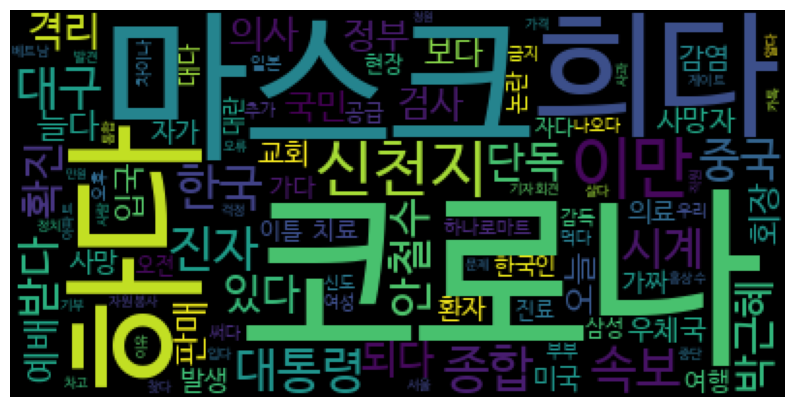

In [40]:
import matplotlib.font_manager as fm
font_path = "/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf"

wordcloud = WordCloud(font_path=font_path,
                      max_font_size = 100)

cloud = wordcloud.generate_from_frequencies(dict(word_counts))
plt.figure(figsize = (10,8))
plt.axis("off")
plt.imshow(cloud)
plt.show()